In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
from tabulate import tabulate
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
# Đọc dữ liệu từ tệp CSV
df = pd.read_csv("botswana_bank_customer_churn.csv")

In [2]:
# Kiểm tra trùng lặp trong dữ liệu
duplicates = df.duplicated()  # Trả về một Series với True nếu dòng bị trùng lặp
print("Số dòng trùng lặp:", duplicates.sum())

# Hiển thị các dòng trùng lặp (nếu có)
print("Các dòng trùng lặp:")
print(df[duplicates])

Số dòng trùng lặp: 0
Các dòng trùng lặp:
Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, First Name, Date of Birth, Gender, Marital Status, Number of Dependents, Occupation, Income, Education Level, Address, Contact Information, Customer Tenure, Customer Segment, Preferred Communication Channel, Credit Score, Credit History Length, Outstanding Loans, Churn Flag, Churn Reason, Churn Date, Balance, NumOfProducts, NumComplaints]
Index: []

[0 rows x 25 columns]


# Thông tin cơ bản về dữ liệu

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115640 entries, 0 to 115639
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   RowNumber                        115640 non-null  int64  
 1   CustomerId                       115640 non-null  object 
 2   Surname                          115640 non-null  object 
 3   First Name                       115640 non-null  object 
 4   Date of Birth                    115640 non-null  object 
 5   Gender                           115640 non-null  object 
 6   Marital Status                   115640 non-null  object 
 7   Number of Dependents             115640 non-null  int64  
 8   Occupation                       115640 non-null  object 
 9   Income                           115640 non-null  float64
 10  Education Level                  115640 non-null  object 
 11  Address                          115640 non-null  object 
 12  Co

In [4]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
First Name,0
Date of Birth,0
Gender,0
Marital Status,0
Number of Dependents,0
Occupation,0
Income,0


In [5]:
print(df.describe())

           RowNumber  Number of Dependents         Income  Customer Tenure  \
count  115640.000000         115640.000000  115640.000000    115640.000000   
mean    57820.500000              2.502923   52641.363046        15.490591   
std     33382.536902              1.707249   27429.756390         8.654217   
min         1.000000              0.000000    5000.960000         1.000000   
25%     28910.750000              1.000000   28857.070000         8.000000   
50%     57820.500000              3.000000   52658.110000        15.000000   
75%     86730.250000              4.000000   76364.157500        23.000000   
max    115640.000000              5.000000   99999.510000        30.000000   

        Credit Score  Credit History Length  Outstanding Loans     Churn Flag  \
count  115640.000000          115640.000000      115640.000000  115640.000000   
mean      574.299775              15.546602       25502.731792       0.121878   
std       159.067499               8.654630       1412

# Tiền xử lí dữ liệu

In [6]:
#Lọc cột không cần thiết
#Các cột không cần thiết bao gồm RowNumber, CustomerId, Surname, First Name, Date of Birth, Address, Contact Information, Churn Reason, và Churn Date

columns_to_drop = [
    'RowNumber', 'CustomerId', 'Surname', 'First Name',
    'Occupation', 'Address', 'Contact Information',
    'Churn Reason', 'Churn Date'
]

# Lọc cột không cần thiết nếu chúng tồn tại trong DataFrame
filtered_data = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Kiểm tra kết quả sau khi lọc
print(filtered_data.head())  # In ra 5 dòng đầu của dữ liệu đã được lọc
print(filtered_data.columns)  # In ra danh sách các cột còn lại trong dữ liệu


  Date of Birth  Gender Marital Status  Number of Dependents    Income  \
0     8/29/1987    Male       Divorced                     3  77710.14   
1      2/7/2000  Female        Married                     1  58209.87   
2      2/3/1954  Female         Single                     1   9794.01   
3     1/15/1991  Female       Divorced                     5  15088.98   
4      4/8/1992  Female       Divorced                     2  60726.56   

  Education Level  Customer Tenure Customer Segment  \
0     High School               30           Retail   
1     High School               27              SME   
2     High School               14           Retail   
3     High School               23        Corporate   
4        Master's               22        Corporate   

  Preferred Communication Channel  Credit Score  Credit History Length  \
0                           Phone           397                     24   
1                           Email           665                     10   
2 

In [7]:
# Xử lý ngày sinh và tính tuổi
from datetime import datetime
import pandas as pd

# Chuyển đổi cột 'Date of Birth' thành datetime, nếu có lỗi thì sẽ gán NaT
filtered_data['Date of Birth'] = pd.to_datetime(filtered_data['Date of Birth'], errors='coerce')

# Tính tuổi dựa trên ngày sinh và thay thế cột 'Date of Birth' bằng cột 'age'
filtered_data['age'] = (pd.to_datetime('today') - filtered_data['Date of Birth']).dt.days // 365

# loại bỏ cột 'Date of Birth' và chỉ giữ lại tuổi
filtered_data = filtered_data.drop(columns=['Date of Birth'])

In [8]:
# Duyệt qua các cột phân loại (object)
for col in filtered_data.columns:
    if filtered_data[col].dtype == 'object':
        # Tính giá trị đếm
        value_counts = filtered_data[col].value_counts().sort_values(ascending=False)

        # Chuyển kết quả value_counts thành bảng
        print(f"Value counts for {col}:")
        print(tabulate(value_counts.reset_index(), headers=["Value", "Count"], tablefmt="fancy_grid"))
        print("\n" + "="*50 + "\n")

Value counts for Gender:
╒════╤═════════╤═════════╕
│    │ Value   │   Count │
╞════╪═════════╪═════════╡
│  0 │ Female  │   57830 │
├────┼─────────┼─────────┤
│  1 │ Male    │   57810 │
╘════╧═════════╧═════════╛


Value counts for Marital Status:
╒════╤══════════╤═════════╕
│    │ Value    │   Count │
╞════╪══════════╪═════════╡
│  0 │ Single   │   38684 │
├────┼──────────┼─────────┤
│  1 │ Divorced │   38539 │
├────┼──────────┼─────────┤
│  2 │ Married  │   38417 │
╘════╧══════════╧═════════╛


Value counts for Education Level:
╒════╤═════════════╤═════════╕
│    │ Value       │   Count │
╞════╪═════════════╪═════════╡
│  0 │ Master's    │   28970 │
├────┼─────────────┼─────────┤
│  1 │ Diploma     │   28950 │
├────┼─────────────┼─────────┤
│  2 │ High School │   28868 │
├────┼─────────────┼─────────┤
│  3 │ Bachelor's  │   28852 │
╘════╧═════════════╧═════════╛


Value counts for Customer Segment:
╒════╤═══════════╤═════════╕
│    │ Value     │   Count │
╞════╪═══════════╪═════════

In [9]:
# Mã hóa nhị phân các cột phân loại với 2 giá trị
filtered_data['Gender'] = filtered_data['Gender'].map({'Female': 1, 'Male': 0})
filtered_data['Preferred Communication Channel'] = filtered_data['Preferred Communication Channel'].map({'Email': 1, 'Phone': 0})

# Mã hóa các cột phân loại với nhiều giá trị và thay thế các cột cũ
filtered_data = pd.get_dummies(filtered_data, columns=['Marital Status', 'Education Level', 'Customer Segment'], drop_first=True)
filtered_data = filtered_data.astype({col: int for col in filtered_data.select_dtypes(include=['bool']).columns})

# Kiểm tra kết quả sau khi mã hóa
print(filtered_data.head())

   Gender  Number of Dependents    Income  Customer Tenure  \
0       0                     3  77710.14               30   
1       1                     1  58209.87               27   
2       1                     1   9794.01               14   
3       1                     5  15088.98               23   
4       1                     2  60726.56               22   

   Preferred Communication Channel  Credit Score  Credit History Length  \
0                                0           397                     24   
1                                1           665                     10   
2                                1           715                     21   
3                                0           747                     17   
4                                1           549                     25   

   Outstanding Loans  Churn Flag    Balance  NumOfProducts  NumComplaints  \
0           41959.74           0  211359.05              1              0   
1            8916.67  

In [10]:
# Chuẩn bị dữ liệu
X = filtered_data.drop(['Churn Flag'], axis=1)
y = filtered_data['Churn Flag']

In [11]:
# Phân tích thống kê cơ bản của dữ liệu
X.describe()


,Gender,Number of Dependents,Income,Customer Tenure,Preferred Communication Channel,Credit Score,Credit History Length,Outstanding Loans,Balance,NumOfProducts,NumComplaints,age,Marital Status_Married,Marital Status_Single,Education Level_Diploma,Education Level_High School,Education Level_Master's,Customer Segment_Retail,Customer Segment_SME
count,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000
mean,0.500086,2.502923,52641.363046,15.490591,0.501937,574.299775,15.546602,25502.731792,124639.209748,2.999274,4.991724,46.946913,0.332212,0.334521,0.250346,0.249637,0.250519,0.329739,0.336415
std,0.500002,1.707249,27429.756390,8.654217,0.499998,159.067499,8.654630,14127.859827,72210.476638,1.411361,3.159283,16.726232,0.471009,0.471825,0.433214,0.432805,0.433314,0.470120,0.472485
min,0.000000,0.000000,5000.960000,1.000000,0.000000,300.000000,1.000000,1000.430000,1.060000,1.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,28857.070000,8.000000,0.000000,436.000000,8.000000,13226.060000,61991.915000,2.000000,2.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,3.000000,52658.110000,15.000000,1.000000,574.000000,16.000000,25505.285000,124505.890000,3.000000,5.000000,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,4.000000,76364.157500,23.000000,1.000000,712.000000,23.000000,37742.250000,187122.922500,4.000000,8.000000,61.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,5.000000,99999.510000,30.000000,1.000000,850.000000,30.000000,49999.690000,249998.910000,5.000000,10.000000,76.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Ma trận tương quan giữa các cột

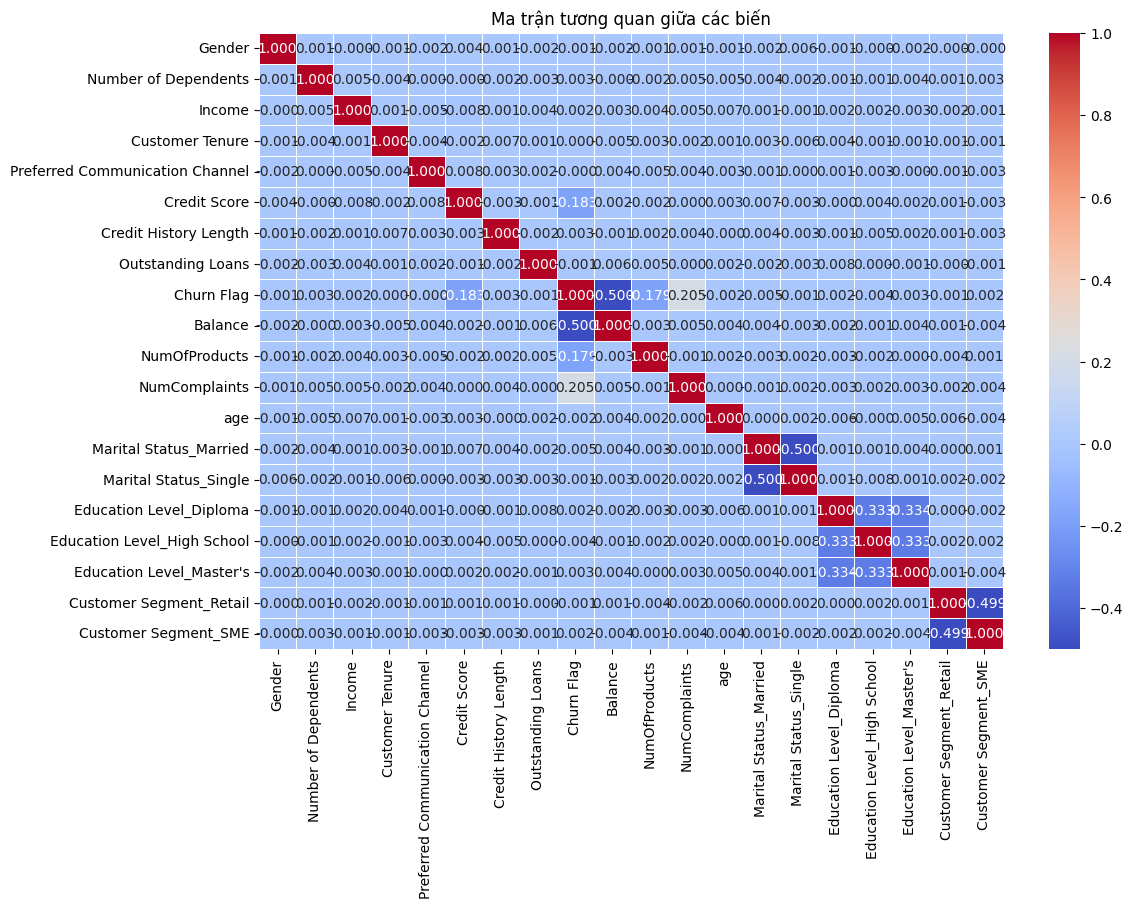

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tính toán ma trận tương quan
correlation_matrix = filtered_data.corr()

# Tạo biểu đồ heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', linewidths=0.5)

# Thiết lập tiêu đề cho biểu đồ
plt.title('Ma trận tương quan giữa các biến')
plt.show()

# Biểu đồ tương quan giữa biến mục tiêu và biến

<ipython-input-13-625ca47dde5a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_sorted.index, y=correlation_sorted.values, palette="viridis")


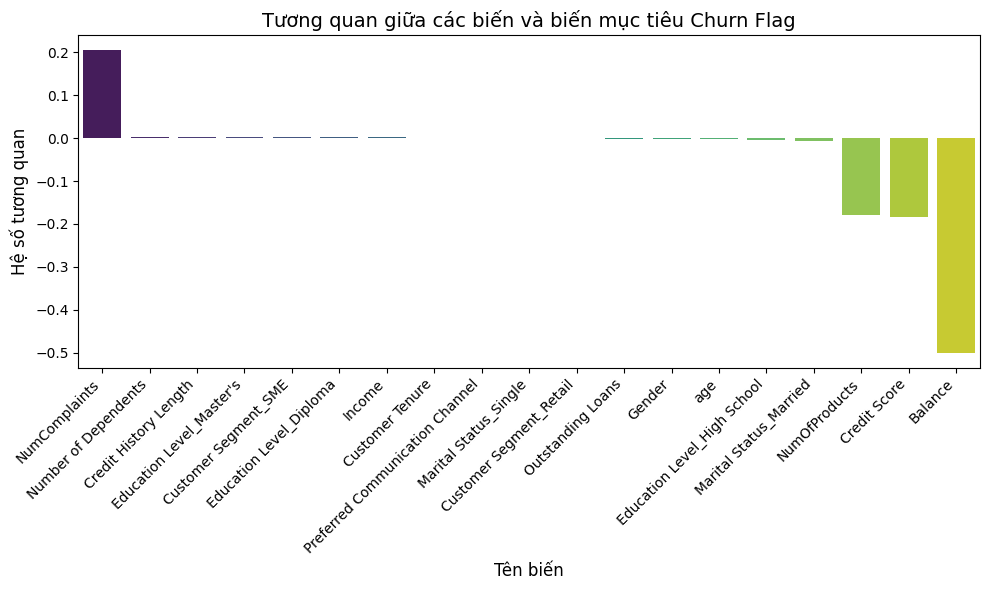

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tính tương quan với biến mục tiêu
correlation_with_target = filtered_data.corr()['Churn Flag'].drop('Churn Flag')

# Sắp xếp tương quan theo giá trị
correlation_sorted = correlation_with_target.sort_values(ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_sorted.index, y=correlation_sorted.values, palette="viridis")
plt.title("Tương quan giữa các biến và biến mục tiêu Churn Flag", fontsize=14)
plt.ylabel("Hệ số tương quan", fontsize=12)
plt.xlabel("Tên biến", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [14]:
# Chia dữ liệu
from sklearn.model_selection import train_test_split
X_train_7_3, X_test_7_3, y_train_7_3, y_test_7_3 = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.model_selection import train_test_split
X_train_4_1, X_test_4_1, y_train_4_1, y_test_4_1 = train_test_split(X,y, test_size=0.2, random_state=42)
from sklearn.model_selection import train_test_split
X_train_6_4, X_test_6_4, y_train_6_4, y_test_6_4 = train_test_split(X,y, test_size=0.4, random_state=42)

In [15]:
# Chuẩn hóa chỉ trên tập huấn luyện
scaler = StandardScaler()
X_train_7_3 = scaler.fit_transform(X_train_7_3)  # Fit và transform trên tập huấn luyện
X_test_7_3 = scaler.transform(X_test_7_3)       # Chỉ transform trên tập kiểm tra
scaler_4_1 = StandardScaler()
X_train_4_1 = scaler_4_1.fit_transform(X_train_4_1)  # Fit và transform trên tập huấn luyện
X_test_4_1 = scaler_4_1.transform(X_test_4_1)        # Transform trên tập kiểm tra
scaler_6_4 = StandardScaler()
X_train_6_4 = scaler_6_4.fit_transform(X_train_6_4)  # Fit và transform trên tập huấn luyện
X_test_6_4 = scaler_6_4.transform(X_test_6_4)        # Transform trên tập kiểm tra

In [16]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Giảm chiều dữ liêu bằng PCA

In [17]:
from sklearn.decomposition import PCA

# Áp dụng PCA
pca = PCA(n_components=0.80)  # Giảm xuống còn 85%
X_pca = pca.fit_transform(X_scaled)

# Kiểm tra tỷ lệ phương sai giải thích của các thành phần
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Tỷ lệ phương sai giải thích: {explained_variance_ratio}")
print(f"Tổng phương sai giải thích: {np.sum(explained_variance_ratio)}")


Tỷ lệ phương sai giải thích: [0.07909061 0.07881694 0.07024523 0.0701712  0.05372196 0.0534506
 0.05322566 0.05305379 0.05279039 0.05258941 0.05244086 0.05233274
 0.05214732 0.05211263]
Tổng phương sai giải thích: 0.8261893270969674


#Giảm chiều dữ liệu bằng LDA

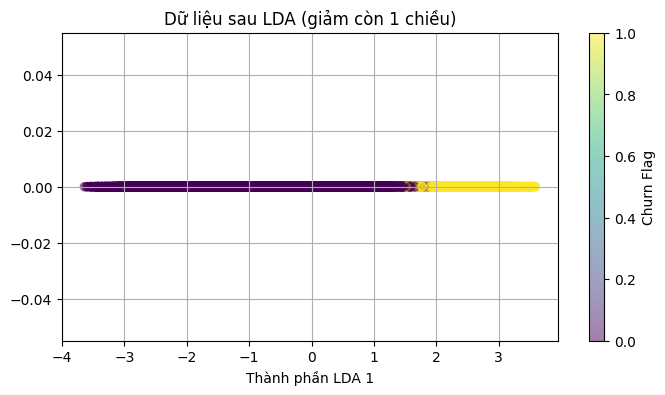

Tỷ lệ phương sai giải thích bởi thành phần LDA 1: 1.00


In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# Bước 3: Áp dụng LDA với 2 thành phần chính
lda = LDA(n_components=1)
X_lda_1d = lda.fit_transform(X_scaled, y)

# Bước 4: Trực quan hóa dữ liệu sau khi giảm chiều
plt.figure(figsize=(8, 4))
plt.scatter(X_lda_1d[:, 0], [0] * len(X_lda_1d), c=y, cmap='viridis', alpha=0.5)
plt.xlabel('Thành phần LDA 1')
plt.title('Dữ liệu sau LDA (giảm còn 1 chiều)')
plt.colorbar(label='Churn Flag')
plt.grid(True)
plt.show()

# In thông tin quan trọng
explained_variance_ratio = lda.explained_variance_ratio_
print(f"Tỷ lệ phương sai giải thích bởi thành phần LDA 1: {explained_variance_ratio[0]:.2f}")

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

#Áp dụng mô hình SVM trên dữ liệu gốc

Áp dụng trên tập train test 7-3

In [20]:
clf = SVC(kernel='linear', C = 5)
clf.fit(X_train_7_3, y_train_7_3)

w = clf.coef_[0]
w0 = clf.intercept_[0]
print("w = ", w)
print("w0 = ", w0)

#Predcit on train set 7-3
y_pred_train_7_3 = clf.predict(X_train_7_3)

#Apply on train set 7-3
print("Train set 7-3")
print(classification_report(y_train_7_3, y_pred_train_7_3))
print(confusion_matrix(y_train_7_3, y_pred_train_7_3))

#Predict on test set 7-3
y_pred_test_7_3 = clf.predict(X_test_7_3)

#Apply on test set 7-3
print("Test set 7-3")
print(classification_report(y_test_7_3, y_pred_test_7_3))
print(confusion_matrix(y_test_7_3, y_pred_test_7_3))


w =  [-5.96370317e-02 -2.90306734e-02 -7.04520324e-04  5.06275174e-02
  7.67828590e-02 -1.09043287e+01  1.10720453e-02  2.14025000e-02
 -4.20155223e+01 -1.09260108e+01  1.23116019e+01 -1.81164515e-02
  3.71681506e-02  3.68173430e-03 -2.72764702e-02 -7.35624264e-02
 -4.60532727e-02 -4.03411522e-02  4.33036633e-04]
w0 =  -57.739359484279085
Train set 7-3
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71127
           1       1.00      1.00      1.00      9821

    accuracy                           1.00     80948
   macro avg       1.00      1.00      1.00     80948
weighted avg       1.00      1.00      1.00     80948

[[71112    15]
 [   21  9800]]
Test set 7-3
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30419
           1       1.00      1.00      1.00      4273

    accuracy                           1.00     34692
   macro avg       1.00      1.00      1.00     34692
we

ÁP dụng mô hình trên tập train test 8-2

In [21]:
clf = SVC(kernel='linear', C = 5)
clf.fit(X_train_4_1, y_train_4_1)

w = clf.coef_[0]
w0 = clf.intercept_[0]
print("w = ", w)
print("w0 = ", w0)

#Predcit on train set 4-1
y_pred_train_4_1 = clf.predict(X_train_4_1)

#Apply on train set 4-1
print("Train set 4-1")
print(classification_report(y_train_4_1, y_pred_train_4_1))
print(confusion_matrix(y_train_4_1, y_pred_train_4_1))

#Predict on test set 4-1
y_pred_test_4_1 = clf.predict(X_test_4_1)

#Apply on test set 4-1
print("Test set 4-1")
print(classification_report(y_test_4_1, y_pred_test_4_1))
print(confusion_matrix(y_test_4_1, y_pred_test_4_1))


w =  [-5.13728063e-02  1.15430121e-03  7.48049572e-03  3.16125968e-02
  5.49434506e-02 -1.12807404e+01  1.42958285e-02  1.90722730e-02
 -4.35243145e+01 -1.13271611e+01  1.27354389e+01 -2.20617258e-02
 -1.09507129e-02 -1.41968860e-02  2.56179393e-02 -1.41613601e-02
 -1.21734318e-03 -4.38968901e-02 -1.59448171e-02]
w0 =  -59.68223206853332
Train set 4-1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     81245
           1       1.00      1.00      1.00     11267

    accuracy                           1.00     92512
   macro avg       1.00      1.00      1.00     92512
weighted avg       1.00      1.00      1.00     92512

[[81229    16]
 [   12 11255]]
Test set 4-1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20301
           1       1.00      1.00      1.00      2827

    accuracy                           1.00     23128
   macro avg       1.00      1.00      1.00     23128
wei

Áp dụng mô hình trên tập train test 6-4

In [22]:
clf = SVC(kernel='linear', C = 5)
clf.fit(X_train_6_4, y_train_6_4)

w = clf.coef_[0]
w0 = clf.intercept_[0]
print("w = ", w)
print("w0 = ", w0)

#Predcit on train set 6-4
y_pred_train_6_4 = clf.predict(X_train_6_4)

#Apply on train set 6-4
print("Train set 6-4")
print(classification_report(y_train_6_4, y_pred_train_6_4))
print(confusion_matrix(y_train_6_4, y_pred_train_6_4))

#Predict on test set 6-4
y_pred_test_6_4 = clf.predict(X_test_6_4)

#Apply on test set 6-4
print("Test set 6-4")
print(classification_report(y_test_6_4, y_pred_test_6_4))
print(confusion_matrix(y_test_6_4, y_pred_test_6_4))


w =  [-3.91265625e-02 -2.90337427e-02  1.77524632e-02  4.96021114e-02
  6.23046095e-02 -1.04111833e+01  5.21715960e-03 -5.38756281e-04
 -4.00982494e+01 -1.04405387e+01  1.17818425e+01 -2.30169408e-02
  4.59039209e-02  2.80183232e-02 -3.77735423e-02 -8.02085961e-02
 -5.69230906e-02 -1.80848022e-02  3.22169651e-02]
w0 =  -55.17888065298906
Train set 6-4
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     60970
           1       1.00      1.00      1.00      8414

    accuracy                           1.00     69384
   macro avg       1.00      1.00      1.00     69384
weighted avg       1.00      1.00      1.00     69384

[[60957    13]
 [   21  8393]]
Test set 6-4
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40576
           1       1.00      1.00      1.00      5680

    accuracy                           1.00     46256
   macro avg       1.00      1.00      1.00     46256
wei

#Áp dụng mô hình SVM trên tập dữ liệu đã giảm chiều bằng PCA, LDA

#PCA

In [23]:
# Chia dữ liệu pca
from sklearn.model_selection import train_test_split
X_train_pca_7_3, X_test_pca_7_3, y_train_pca_7_3, y_test_pca_7_3 = train_test_split(X_pca, y, test_size=0.3, random_state=42)
X_train_pca_6_4, X_test_pca_6_4, y_train_pca_6_4, y_test_pca_6_4 = train_test_split(X_pca, y, test_size=0.4, random_state=42)
X_train_pca_8_2, X_test_pca_8_2, y_train_pca_8_2, y_test_pca_8_2 = train_test_split(X_pca, y, test_size=0.2, random_state=42)

Áp dụng trên tập train test 7-3

In [24]:
clf = SVC(kernel='linear', C=5)
clf.fit(X_train_pca_7_3, y_train_pca_7_3)

w = clf.coef_
w0 = clf.intercept_
print("w = ", w)
print("w0 = ", w0)

#Predcit on train set 7-3
y_pred_train_pca_7_3 = clf.predict(X_train_pca_7_3)

#Apply on train set 7-3
print("Train set 7-3")
print(classification_report(y_train_pca_7_3, y_pred_train_pca_7_3))
print(confusion_matrix(y_train_pca_7_3, y_pred_train_pca_7_3))

#Predict on test set 7-3
y_pred_test_pca_7_3 = clf.predict(X_test_pca_7_3)

#Apply on test set 7-3
print("Test set 7-3")
print(classification_report(y_test_pca_7_3, y_pred_test_pca_7_3))
print(confusion_matrix(y_test_pca_7_3, y_pred_test_pca_7_3))


w =  [[ 0.02757335 -0.0347218  -0.03941727 -0.00915595  0.36600708 -1.70739058
   1.32475253  0.54497485 -0.26529911 -0.60029425 -0.6394866   0.0581758
  -0.23766935 -3.24691791]]
w0 =  [-5.14689907]
Train set 7-3
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     71127
           1       0.81      0.75      0.78      9821

    accuracy                           0.95     80948
   macro avg       0.89      0.86      0.88     80948
weighted avg       0.95      0.95      0.95     80948

[[69441  1686]
 [ 2432  7389]]
Test set 7-3
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     30419
           1       0.82      0.75      0.78      4273

    accuracy                           0.95     34692
   macro avg       0.89      0.86      0.88     34692
weighted avg       0.95      0.95      0.95     34692

[[29710   709]
 [ 1081  3192]]


Áp dụng trên tập train test 4-1

In [25]:
clf = SVC(kernel='linear',C=5)
clf.fit(X_train_pca_8_2, y_train_pca_8_2)

w = clf.coef_
w0 = clf.intercept_
print("w = ", w)
print("w0 = ", w0)

#Predcit on train set 8-2
y_pred_train_pca_8_2 = clf.predict(X_train_pca_8_2)

#Apply on train set 8-2
print("Train set 8-2")
print(classification_report(y_train_pca_8_2, y_pred_train_pca_8_2))
print(confusion_matrix(y_train_pca_8_2, y_pred_train_pca_8_2))

#Predict on test set 8-2
y_pred_test_pca_8_2 = clf.predict(X_test_pca_8_2)

#Apply on test set 8-2
print("Test set 8-2")
print(classification_report(y_test_pca_8_2, y_pred_test_pca_8_2))
print(confusion_matrix(y_test_pca_8_2, y_pred_test_pca_8_2))

w =  [[ 0.02641986 -0.04012403 -0.03274074 -0.00851442  0.36332234 -1.70923752
   1.3209866   0.53868346 -0.26322173 -0.60425725 -0.63941202  0.06713398
  -0.23048696 -3.24257075]]
w0 =  [-5.14437851]
Train set 8-2
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     81245
           1       0.82      0.75      0.78     11267

    accuracy                           0.95     92512
   macro avg       0.89      0.86      0.88     92512
weighted avg       0.95      0.95      0.95     92512

[[79339  1906]
 [ 2813  8454]]
Test set 8-2
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     20301
           1       0.82      0.75      0.78      2827

    accuracy                           0.95     23128
   macro avg       0.89      0.86      0.88     23128
weighted avg       0.95      0.95      0.95     23128

[[19832   469]
 [  714  2113]]


Áp dụng trên tập train test 6-4

In [26]:
clf = SVC(kernel='linear',C=5)
clf.fit(X_train_pca_6_4, y_train_6_4)

w = clf.coef_
w0 = clf.intercept_
print("w = ", w)
print("w0 = ", w0)

#Predcit on train set 6-4
y_pred_train_pca_6_4 = clf.predict(X_train_pca_6_4)

#Apply on train set 6-4
print("Train set 6-4")
print(classification_report(y_train_pca_6_4, y_pred_train_pca_6_4))
print(confusion_matrix(y_train_pca_6_4, y_pred_train_pca_6_4))

#Predict on test set 6-4
y_pred_test_pca_6_4 = clf.predict(X_test_pca_6_4)

#Apply on test set 6-4
print("Test set 6-4")
print(classification_report(y_test_pca_6_4, y_pred_test_pca_6_4))
print(confusion_matrix(y_test_pca_6_4, y_pred_test_pca_6_4))

w =  [[ 0.03266177 -0.03702118 -0.04597918 -0.01067408  0.36910404 -1.70563432
   1.31985589  0.54793702 -0.28023837 -0.59147526 -0.63427752  0.05828583
  -0.23838732 -3.24318331]]
w0 =  [-5.14162991]
Train set 6-4
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     60970
           1       0.81      0.75      0.78      8414

    accuracy                           0.95     69384
   macro avg       0.89      0.86      0.88     69384
weighted avg       0.95      0.95      0.95     69384

[[59516  1454]
 [ 2083  6331]]
Test set 6-4
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     40576
           1       0.82      0.75      0.78      5680

    accuracy                           0.95     46256
   macro avg       0.89      0.86      0.88     46256
weighted avg       0.95      0.95      0.95     46256

[[39650   926]
 [ 1436  4244]]


#LDA

In [27]:
# Chia dữ liệu LDA với tỷ lệ 70:30
X_train_lda_7_3, X_test_lda_7_3, y_train_lda_7_3, y_test_lda_7_3 = train_test_split(X_lda_1d, y, test_size=0.3, random_state=42)

# Chia dữ liệu LDA với tỷ lệ 60:40
X_train_lda_6_4, X_test_lda_6_4, y_train_lda_6_4, y_test_lda_6_4 = train_test_split(X_lda_1d, y, test_size=0.4, random_state=42)

# Chia dữ liệu LDA với tỷ lệ 80:20
X_train_lda_8_2, X_test_lda_8_2, y_train_lda_8_2, y_test_lda_8_2 = train_test_split(X_lda_1d, y, test_size=0.2, random_state=42)

Áp dụng trên tập train test 7-3

In [28]:
clf = SVC(kernel='linear', C = 5)
clf.fit(X_train_lda_7_3, y_train_lda_7_3)

w = clf.coef_
w0 = clf.intercept_
print("w = ", w)
print("w0 = ", w0)

#Predcit on train set 7-3
y_pred_train_lda_7_3 = clf.predict(X_train_lda_7_3)

#Apply on train set 7-3
print("Train set 7-3")
print(classification_report(y_train_lda_7_3, y_pred_train_lda_7_3))
print(confusion_matrix(y_train_lda_7_3, y_pred_train_lda_7_3))

#Predict on test set 7-3
y_pred_test_lda_7_3 = clf.predict(X_test_lda_7_3)

#Apply on test set 7-3
print("Test set 7-3")
print(classification_report(y_test_lda_7_3, y_pred_test_lda_7_3))
print(confusion_matrix(y_test_lda_7_3, y_pred_test_lda_7_3))


w =  [[7.80695608]]
w0 =  [-11.96594227]
Train set 7-3
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     71127
           1       0.91      0.91      0.91      9821

    accuracy                           0.98     80948
   macro avg       0.95      0.95      0.95     80948
weighted avg       0.98      0.98      0.98     80948

[[70285   842]
 [  908  8913]]
Test set 7-3
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     30419
           1       0.91      0.91      0.91      4273

    accuracy                           0.98     34692
   macro avg       0.95      0.95      0.95     34692
weighted avg       0.98      0.98      0.98     34692

[[30050   369]
 [  400  3873]]


Áp dụng trên tập train test 8-2

In [30]:
clf = SVC(kernel='linear', C = 5)
clf.fit(X_train_lda_8_2, y_train_lda_8_2)

w = clf.coef_
w0 = clf.intercept_
print("w = ", w)
print("w0 = ", w0)

#Predcit on train set 8-2
y_pred_train_lda_8_2 = clf.predict(X_train_lda_8_2)

#Apply on train set 8-2
print("Train set 8-2")
print(classification_report(y_train_lda_8_2, y_pred_train_lda_8_2))
print(confusion_matrix(y_train_lda_8_2, y_pred_train_lda_8_2))

#Predict on test set 8-2
y_pred_test_lda_8_2 = clf.predict(X_test_lda_8_2)

#Apply on test set 8-2
print("Test set 8-2")
print(classification_report(y_test_lda_8_2, y_pred_test_lda_8_2))
print(confusion_matrix(y_test_lda_8_2, y_pred_test_lda_8_2))

w =  [[7.85193806]]
w0 =  [-12.04026335]
Train set 8-2
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     81245
           1       0.91      0.91      0.91     11267

    accuracy                           0.98     92512
   macro avg       0.95      0.95      0.95     92512
weighted avg       0.98      0.98      0.98     92512

[[80292   953]
 [ 1055 10212]]
Test set 8-2
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     20301
           1       0.91      0.91      0.91      2827

    accuracy                           0.98     23128
   macro avg       0.95      0.95      0.95     23128
weighted avg       0.98      0.98      0.98     23128

[[20047   254]
 [  259  2568]]


Áp dụng trên tập train test 6-4

In [31]:
clf = SVC(kernel='linear', C = 5)
clf.fit(X_train_lda_6_4, y_train_lda_6_4)

w = clf.coef_
w0 = clf.intercept_
print("w = ", w)
print("w0 = ", w0)

#Predcit on train set 6-4
y_pred_train_lda_6_4 = clf.predict(X_train_lda_6_4)

#Apply on train set 6-4
print("Train set 6-4")
print(classification_report(y_train_lda_6_4, y_pred_train_lda_6_4))
print(confusion_matrix(y_train_lda_6_4, y_pred_train_lda_6_4))

#Predict on test set 6-4
y_pred_test_lda_6_4 = clf.predict(X_test_lda_6_4)

#Apply on test set 6-4
print("Test set 6-4")
print(classification_report(y_test_lda_6_4, y_pred_test_lda_6_4))
print(confusion_matrix(y_test_lda_6_4, y_pred_test_lda_6_4))

w =  [[7.8744403]]
w0 =  [-12.0831113]
Train set 6-4
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     60970
           1       0.91      0.91      0.91      8414

    accuracy                           0.98     69384
   macro avg       0.95      0.95      0.95     69384
weighted avg       0.98      0.98      0.98     69384

[[60246   724]
 [  784  7630]]
Test set 6-4
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     40576
           1       0.92      0.91      0.91      5680

    accuracy                           0.98     46256
   macro avg       0.95      0.95      0.95     46256
weighted avg       0.98      0.98      0.98     46256

[[40100   476]
 [  539  5141]]
